In [141]:
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

In [142]:
iris = load_iris()

X = iris.data
y = iris.target

y = to_categorical(y)


In [143]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [145]:
scaler = StandardScaler()

In [146]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [147]:
model = Sequential()
model.add(Dense(10, input_shape=(4,), activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [148]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [149]:
history = model.fit(X_train, y_train, epochs=60, batch_size=10, validation_split=0.2)

Epoch 1/60
10/10 [==============================] - 0s 22ms/step - loss: 1.3896 - accuracy: 0.1354 - val_loss: 1.2646 - val_accuracy: 0.2500
Epoch 2/60
10/10 [==============================] - 0s 4ms/step - loss: 1.3100 - accuracy: 0.2083 - val_loss: 1.2082 - val_accuracy: 0.2500
Epoch 3/60
10/10 [==============================] - 0s 3ms/step - loss: 1.2411 - accuracy: 0.2708 - val_loss: 1.1564 - val_accuracy: 0.2917
Epoch 4/60
10/10 [==============================] - 0s 3ms/step - loss: 1.1771 - accuracy: 0.3021 - val_loss: 1.1080 - val_accuracy: 0.3333
Epoch 5/60
10/10 [==============================] - 0s 4ms/step - loss: 1.1205 - accuracy: 0.3542 - val_loss: 1.0631 - val_accuracy: 0.3750
Epoch 6/60
10/10 [==============================] - 0s 4ms/step - loss: 1.0665 - accuracy: 0.3750 - val_loss: 1.0180 - val_accuracy: 0.3750
Epoch 7/60
10/10 [==============================] - 0s 4ms/step - loss: 1.0132 - accuracy: 0.3958 - val_loss: 0.9684 - val_accuracy: 0.4167
Epoch 8/60
10/10 [=

In [150]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: , {loss:.2f}")
print(f"Accuracy: , {accuracy:.2f}")

1/1 [==============================] - 0s 20ms/step - loss: 0.1326 - accuracy: 1.0000
Loss: , 0.13
Accuracy: , 1.00


In [151]:
y_pred = model.predict(X_test)
print(np.round(y_pred[:5], 3))

1/1 [==============================] - 0s 65ms/step
[[0.016 0.803 0.181]
 [0.981 0.018 0.001]
 [0.    0.01  0.99 ]
 [0.014 0.619 0.367]
 [0.008 0.699 0.293]]


Text(0, 0.5, 'Loss')

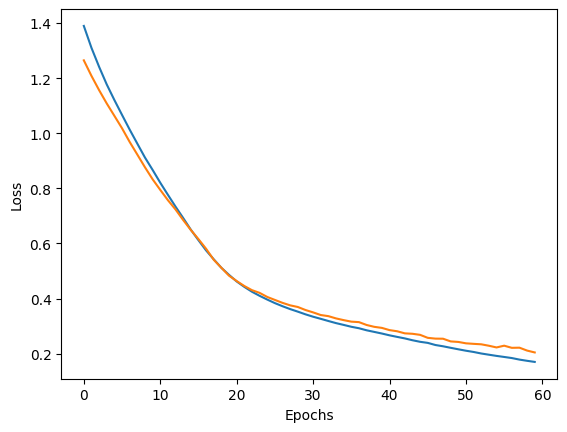

In [154]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")